In [ ]:
#random data generate
import pandas as pd
import numpy as np

sample_num=10000
feature_num=10
class_num=2
dataset_num=2

for class_id in range(dataset_num):
    trainX=np.random.rand(sample_num,feature_num)
    for i in range(feature_num):
        scale=np.random.uniform(low=0,high=100)
        trainX[:,i]=trainX[:,i]*scale
    trainY=np.random.randint(class_num,size=sample_num).reshape((-1,1))
    train_data=np.hstack((trainX,trainY))
    df=pd.DataFrame(train_data)
    col_names=[f"feature_{i+1}" for i in range(feature_num)]+["label"]
    df.set_axis(col_names, axis=1,inplace=True)
    df.to_csv(f"data_{class_id}.csv")

In [ ]:
#get random data
import pandas as pd
data0 = pd.read_csv('data_0.csv').drop('Unnamed: 0',axis=1)
data1 = pd.read_csv('data_1.csv').drop('Unnamed: 0',axis=1)
X0_data_user = data0[['feature_1','feature_2','feature_3','feature_4','feature_5','feature_6']]
X1_data_user = data1[['feature_1','feature_2','feature_3','feature_4','feature_5','feature_6']]
X0_data_item = data0[['feature_7','feature_8','feature_9','feature_10']]
X1_data_item = data1[['feature_7','feature_8','feature_9','feature_10']]
Y0_data = data0['label']
Y1_data = data1['label']


X0_data_user_test = X0_data_user[8000:]
X1_data_user_test = X1_data_user[8000:]
X0_data_item_test = X0_data_item[8000:]
X1_data_item_test = X1_data_item[8000:]
Y0_data_test = Y0_data[8000:]
Y1_data_test = Y1_data[8000:]

X0_data_user = X0_data_user[:8000]
X1_data_user = X1_data_user[:8000]
X0_data_item = X0_data_item[:8000]
X1_data_item = X1_data_item[:8000]
Y0_data = Y0_data[:8000]
Y1_data = Y1_data[:8000]

In [31]:
import tensorflow as tf
tf.config.set_soft_device_placement(True)
tf.debugging.set_log_device_placement(True)
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import os
import time
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import *
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve,auc,precision_recall_curve,roc_curve
import matplotlib.pyplot as plt
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = "true"

In [ ]:
#titanic
data = pd.read_csv('titanic.csv')
data = data.dropna()
data = (data-data.min())/(data.max()-data.min())

sample_num = 714
half_data_num = int(sample_num/2)
train_sample_num = int(half_data_num*0.8)
test_sample_num = half_data_num - train_sample_num
feature_num = 5
user_feature_num = 3
item_feature_num = 2

data0 = data[:half_data_num]
data1 = data[half_data_num:]

X0_data_user = data0[['Sex', 'Age', 'SibSp']]
X1_data_user = data1[['Sex', 'Age', 'SibSp']]
X0_data_item = data0[['Parch', 'Fare']]
X1_data_item = data1[['Parch', 'Fare']]
Y0_data = data0['Survived']
Y1_data = data1['PclassThree']


X0_data_user_test = X0_data_user[train_sample_num:]
X1_data_user_test = X1_data_user[train_sample_num:]
X0_data_item_test = X0_data_item[train_sample_num:]
X1_data_item_test = X1_data_item[train_sample_num:]
Y0_data_test = Y0_data[train_sample_num:]
Y1_data_test = Y1_data[train_sample_num:]

X0_data_user = X0_data_user[:train_sample_num]
X1_data_user = X1_data_user[:train_sample_num]
X0_data_item = X0_data_item[:train_sample_num]
X1_data_item = X1_data_item[:train_sample_num]
Y0_data = Y0_data[:train_sample_num]
Y1_data = Y1_data[:train_sample_num]

In [44]:
#click_sample
data = pd.read_csv('click_sample.csv')
data = data.dropna()
data = (data-data.min())/(data.max()-data.min())

sample_num = 2589
if sample_num%2==1 :
   sample_num-=1
   data = data[1:]
half_data_num = int(sample_num/2)
train_sample_num = int(half_data_num*0.8)
test_sample_num = half_data_num - train_sample_num
feature_num = 9
user_feature_num = 5
item_feature_num = 4

data0 = data[:half_data_num]
data1 = data[half_data_num:]

X0_data_user = data0[['time','user_id','creative_id','click_times','ad_id']]
X1_data_user = data1[['time','user_id','creative_id','click_times','ad_id']]
X0_data_item = data0[['product_id','product_category','advertiser_id','industry']]
X1_data_item = data1[['product_id','product_category','advertiser_id','industry']]
Y0_data = data0['age']
Y1_data = data1['gender']


X0_data_user_test = X0_data_user[train_sample_num:]
X1_data_user_test = X1_data_user[train_sample_num:]
X0_data_item_test = X0_data_item[train_sample_num:]
X1_data_item_test = X1_data_item[train_sample_num:]
Y0_data_test = Y0_data[train_sample_num:]
Y1_data_test = Y1_data[train_sample_num:]

X0_data_user = X0_data_user[:train_sample_num]
X1_data_user = X1_data_user[:train_sample_num]
X0_data_item = X0_data_item[:train_sample_num]
X1_data_item = X1_data_item[:train_sample_num]
Y0_data = Y0_data[:train_sample_num]
Y1_data = Y1_data[:train_sample_num]

In [76]:
data = pd.read_csv('census-incom22e.csv')
preprocess_data(data,['income_50k', 'marital_stat'])

([       country_father_ Poland  state_prev_res_ Minnesota  det_ind_code_51  \
  1                           0                          0                0   
  2                           0                          0                0   
  3                           0                          0                0   
  4                           0                          0                0   
  5                           0                          0                0   
  ...                       ...                        ...              ...   
  59852                       0                          0                0   
  59853                       0                          0                0   
  59854                       0                          0                0   
  59855                       0                          0                0   
  59856                       0                          0                0   
  
         major_ind_code_ Transportation  country_

In [75]:
def preprocess_data(data,labels):

    sample_num = data.shape[0]
    if sample_num%2==1 :
       sample_num-=1
       data = data[1:]

    half_data_num = int(sample_num/2)
    train_sample_num = int(half_data_num*0.6)
    val_sample_num = int(half_data_num*0.2)
    test_sample_num = half_data_num - train_sample_num - val_sample_num
    feature_num = data.shape[1]-len(labels)

    features=list(set(data.columns)-set(labels))
    user_feature_num = feature_num//2
    item_feature_num = feature_num-user_feature_num


    user_features=features[:user_feature_num]
    item_features=features[user_feature_num:]


    data0 = data[:half_data_num]
    data1 = data[half_data_num:]

    X0_data_user = data0[user_features]
    X1_data_user = data1[user_features]
    X0_data_item = data0[item_features]
    X1_data_item = data1[item_features]
    Y0_data = data0[labels[0]]
    Y1_data = data1[labels[1]]


    X0_data_user_test = X0_data_user[train_sample_num+val_sample_num:]
    X1_data_user_test = X1_data_user[train_sample_num+val_sample_num:]
    X0_data_item_test = X0_data_item[train_sample_num+val_sample_num:]
    X1_data_item_test = X1_data_item[train_sample_num+val_sample_num:]
    Y0_data_test = Y0_data[train_sample_num+val_sample_num:]
    Y1_data_test = Y1_data[train_sample_num+val_sample_num:]

    X0_data_user_val = X0_data_user[train_sample_num:train_sample_num+val_sample_num]
    X1_data_user_val = X1_data_user[train_sample_num:train_sample_num+val_sample_num]
    X0_data_item_val = X0_data_item[train_sample_num:train_sample_num+val_sample_num]
    X1_data_item_val = X1_data_item[train_sample_num:train_sample_num+val_sample_num]
    Y0_data_val = Y0_data[train_sample_num:train_sample_num+val_sample_num]
    Y1_data_val = Y1_data[train_sample_num:train_sample_num+val_sample_num]
    
    X0_data_user = X0_data_user[:train_sample_num]
    X1_data_user = X1_data_user[:train_sample_num]
    X0_data_item = X0_data_item[:train_sample_num]
    X1_data_item = X1_data_item[:train_sample_num]
    Y0_data = Y0_data[:train_sample_num]
    Y1_data = Y1_data[:train_sample_num]
    
    train_data = [X0_data_user, pd.DataFrame(np.zeros(train_sample_num)), X0_data_item,
                  pd.DataFrame(np.zeros(train_sample_num)), X1_data_user, pd.DataFrame(np.zeros(train_sample_num)),
                  X1_data_item, pd.DataFrame(np.zeros(train_sample_num)), pd.DataFrame(Y0_data), pd.DataFrame(Y1_data)]


    val_data = [X0_data_user_val, pd.DataFrame(np.zeros(val_sample_num)), X0_data_item_val,
                  pd.DataFrame(np.zeros(val_sample_num)), X1_data_user_val, pd.DataFrame(np.zeros(val_sample_num)),
                  X1_data_item_val, pd.DataFrame(np.zeros(val_sample_num)), pd.DataFrame(Y0_data_val), pd.DataFrame(Y1_data_val)]

    test_data = [X0_data_user_test, pd.DataFrame(np.zeros(test_sample_num)), X0_data_item_test,
                  pd.DataFrame(np.zeros(test_sample_num)), X1_data_user_test, pd.DataFrame(np.zeros(test_sample_num)),
                  X1_data_item_test, pd.DataFrame(np.zeros(test_sample_num)), pd.DataFrame(Y0_data_test), pd.DataFrame(Y1_data_test)]
    return train_data,val_data,test_data

In [49]:
#census-incom22e
data = pd.read_csv('census-incom22e.csv')
data = data.dropna()
data = (data-data.min())/(data.max()-data.min())

sample_num = 199523
if sample_num%2==1 :
   sample_num-=1
   data = data[1:]
half_data_num = int(sample_num/2)
train_sample_num = int(half_data_num*0.8)
test_sample_num = half_data_num - train_sample_num
feature_num = 499
user_feature_num = 200
item_feature_num = 299

data0 = data[:half_data_num]
data1 = data[half_data_num:]

X0_data_user = data0.drop(columns=['income_50k','marital_stat']).iloc[:,0:user_feature_num]
X1_data_user = data1.drop(columns=['income_50k','marital_stat']).iloc[:,0:user_feature_num]
X0_data_item = data0.drop(columns=['income_50k','marital_stat']).iloc[:,user_feature_num:]
X1_data_item = data1.drop(columns=['income_50k','marital_stat']).iloc[:,user_feature_num:]
Y0_data = data0['income_50k']
Y1_data = data1['marital_stat']


X0_data_user_test = X0_data_user[train_sample_num:]
X1_data_user_test = X1_data_user[train_sample_num:]
X0_data_item_test = X0_data_item[train_sample_num:]
X1_data_item_test = X1_data_item[train_sample_num:]
Y0_data_test = Y0_data[train_sample_num:]
Y1_data_test = Y1_data[train_sample_num:]

X0_data_user = X0_data_user[:train_sample_num]
X1_data_user = X1_data_user[:train_sample_num]
X0_data_item = X0_data_item[:train_sample_num]
X1_data_item = X1_data_item[:train_sample_num]
Y0_data = Y0_data[:train_sample_num]
Y1_data = Y1_data[:train_sample_num]

In [91]:
class CTCVRNet:
    def __init__(self):
        pass

    def build_ctr_model(self, ctr_user_numerical_input, ctr_user_cate_input, ctr_item_numerical_input,
                        ctr_item_cate_input, ctr_user_cate_feature_dict, ctr_item_cate_feature_dict):

        user_feature = layers.Dropout(0.5)(ctr_user_numerical_input)
        user_feature = layers.BatchNormalization()(user_feature)
        user_feature = layers.Dense(128, activation='relu')(user_feature)
        user_feature = layers.Dense(64, activation='relu')(user_feature)

        item_feature = layers.Dropout(0.5)(ctr_item_numerical_input)
        item_feature = layers.BatchNormalization()(item_feature)
        item_feature = layers.Dense(128, activation='relu')(item_feature)
        item_feature = layers.Dense(64, activation='relu')(item_feature)

        dense_feature = layers.concatenate([user_feature, item_feature], axis=-1)
        dense_feature = layers.Dropout(0.5)(dense_feature)
        dense_feature = layers.BatchNormalization()(dense_feature)
        dense_feature = layers.Dense(64, activation='relu')(dense_feature)
        pred = layers.Dense(1, activation='sigmoid', name='ctr_output')(dense_feature)
        return pred

    def build_cvr_model(self, cvr_user_numerical_input, cvr_user_cate_input, cvr_item_numerical_input,
                        cvr_item_cate_input, cvr_user_cate_feature_dict, cvr_item_cate_feature_dict):

        user_feature = layers.Dropout(0.5)(cvr_user_numerical_input)
        user_feature = layers.BatchNormalization()(user_feature)
        user_feature = layers.Dense(128, activation='relu')(user_feature)
        user_feature = layers.Dense(64, activation='relu')(user_feature)

        item_feature = layers.Dropout(0.5)(cvr_item_numerical_input)
        item_feature = layers.BatchNormalization()(item_feature)
        item_feature = layers.Dense(128, activation='relu')(item_feature)
        item_feature = layers.Dense(64, activation='relu')(item_feature)

        dense_feature = layers.concatenate([user_feature, item_feature], axis=-1)
        dense_feature = layers.Dropout(0.5)(dense_feature)
        dense_feature = layers.BatchNormalization()(dense_feature)
        dense_feature = layers.Dense(64, activation='relu')(dense_feature)
        pred = layers.Dense(1, activation='sigmoid', name='cvr_output')(dense_feature)
        return pred

    def build(self, user_cate_feature_dict, item_cate_feature_dict):
        # CTR model input
        ctr_user_numerical_input = layers.Input(shape=(user_feature_num,))
        ctr_user_cate_input = layers.Input(shape=(0,))
        ctr_item_numerical_input = layers.Input(shape=(item_feature_num,))
        ctr_item_cate_input = layers.Input(shape=(0,))

        # CVR model input
        cvr_user_numerical_input = layers.Input(shape=(user_feature_num,))
        cvr_user_cate_input = layers.Input(shape=(0,))
        cvr_item_numerical_input = layers.Input(shape=(item_feature_num,))
        cvr_item_cate_input = layers.Input(shape=(0,))

        ctr_pred = self.build_ctr_model(ctr_user_numerical_input, ctr_user_cate_input, ctr_item_numerical_input,
                                        ctr_item_cate_input, user_cate_feature_dict, item_cate_feature_dict)
        cvr_pred = self.build_cvr_model(cvr_user_numerical_input, cvr_user_cate_input, cvr_item_numerical_input,
                                        cvr_item_cate_input, user_cate_feature_dict, item_cate_feature_dict)
        ctcvr_pred = tf.multiply(ctr_pred, cvr_pred)
        model = Model(
            inputs=[ctr_user_numerical_input, ctr_user_cate_input, ctr_item_numerical_input, ctr_item_cate_input,
                    cvr_user_numerical_input, cvr_user_cate_input, cvr_item_numerical_input, cvr_item_cate_input],
            outputs=[ctr_pred, ctcvr_pred])

        return model

    def preprocess_data(data,labels):

        sample_num = data.shape[0]
        if sample_num%2==1 :
           sample_num-=1
           data = data[1:]

        half_data_num = int(sample_num/2)
        train_sample_num = int(half_data_num*0.6)
        val_sample_num = int(half_data_num*0.2)
        test_sample_num = half_data_num - train_sample_num - val_sample_num
        feature_num = data.shape[1]-len(labels)

        features=list(set(data.columns)-set(labels))
        user_feature_num = feature_num//2
        item_feature_num = feature_num-user_feature_num


        user_features=features[:user_feature_num]
        item_features=features[user_feature_num:]


        data0 = data[:half_data_num]
        data1 = data[half_data_num:]

        X0_data_user = data0[user_features]
        X1_data_user = data1[user_features]
        X0_data_item = data0[item_features]
        X1_data_item = data1[item_features]
        Y0_data = data0[labels[0]]
        Y1_data = data1[labels[1]]


        X0_data_user_test = X0_data_user[train_sample_num+val_sample_num:]
        X1_data_user_test = X1_data_user[train_sample_num+val_sample_num:]
        X0_data_item_test = X0_data_item[train_sample_num+val_sample_num:]
        X1_data_item_test = X1_data_item[train_sample_num+val_sample_num:]
        Y0_data_test = Y0_data[train_sample_num+val_sample_num:]
        Y1_data_test = Y1_data[train_sample_num+val_sample_num:]

        X0_data_user_val = X0_data_user[train_sample_num:train_sample_num+val_sample_num]
        X1_data_user_val = X1_data_user[train_sample_num:train_sample_num+val_sample_num]
        X0_data_item_val = X0_data_item[train_sample_num:train_sample_num+val_sample_num]
        X1_data_item_val = X1_data_item[train_sample_num:train_sample_num+val_sample_num]
        Y0_data_val = Y0_data[train_sample_num:train_sample_num+val_sample_num]
        Y1_data_val = Y1_data[train_sample_num:train_sample_num+val_sample_num]

        X0_data_user = X0_data_user[:train_sample_num]
        X1_data_user = X1_data_user[:train_sample_num]
        X0_data_item = X0_data_item[:train_sample_num]
        X1_data_item = X1_data_item[:train_sample_num]
        Y0_data = Y0_data[:train_sample_num]
        Y1_data = Y1_data[:train_sample_num]

        train_data = [X0_data_user, pd.DataFrame(np.zeros(train_sample_num)), X0_data_item,
                      pd.DataFrame(np.zeros(train_sample_num)), X1_data_user, pd.DataFrame(np.zeros(train_sample_num)),
                      X1_data_item, pd.DataFrame(np.zeros(train_sample_num)), pd.DataFrame(Y0_data), pd.DataFrame(Y1_data)]


        val_data = [X0_data_user_val, pd.DataFrame(np.zeros(val_sample_num)), X0_data_item_val,
                      pd.DataFrame(np.zeros(val_sample_num)), X1_data_user_val, pd.DataFrame(np.zeros(val_sample_num)),
                      X1_data_item_val, pd.DataFrame(np.zeros(val_sample_num)), pd.DataFrame(Y0_data_val), pd.DataFrame(Y1_data_val)]

        test_data = [X0_data_user_test, pd.DataFrame(np.zeros(test_sample_num)), X0_data_item_test,
                      pd.DataFrame(np.zeros(test_sample_num)), X1_data_user_test, pd.DataFrame(np.zeros(test_sample_num)),
                      X1_data_item_test, pd.DataFrame(np.zeros(test_sample_num)), pd.DataFrame(Y0_data_test), pd.DataFrame(Y1_data_test)]
        return train_data,val_data,test_data
        
    def train(self,data,labels,verbose=0, epoches=20, batchsize=128):
        """
        model train and save as tf serving model
        :param cate_feature_dict: dict, categorical feature for data
        :param user_cate_feature_dict: dict, user categorical feature
        :param item_cate_feature_dict: dict, item categorical feature
        :param train_data: DataFrame, training data
        :param val_data: DataFrame, valdation data
        :return: None
        """
        cate_feature_dict={}
        user_cate_feature_dict={}
        item_cate_feature_dict={}
        train_data, val_data, test_data=preprocess_data(data,labels)
        ctcvr = CTCVRNet()
        ctcvr_model = ctcvr.build(user_cate_feature_dict, item_cate_feature_dict)
        opt = optimizers.Adam(lr=0.003, decay=0.0001)
        ctcvr_model.compile(optimizer=opt, loss=["binary_crossentropy", "binary_crossentropy"], loss_weights=[1.0, 1.0],
                                                metrics=[tf.keras.metrics.AUC()])

        # keras model save path
        filepath = "esmm_best.h5"

        # call back function
        checkpoint = ModelCheckpoint(
            filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
        reduce_lr = ReduceLROnPlateau(
            monitor='val_loss', factor=0.8, patience=2, min_lr=0.0001, verbose=0)
        earlystopping = EarlyStopping(
            monitor='val_loss', min_delta=0.0001, patience=8, verbose=0, mode='auto')
        callbacks = [checkpoint, reduce_lr, earlystopping]

        # load data
        ctr_user_numerical_feature_train, ctr_user_cate_feature_train, ctr_item_numerical_feature_train, \
        ctr_item_cate_feature_train, cvr_user_numerical_feature_train, cvr_user_cate_feature_train, \
        cvr_item_numerical_feature_train, cvr_item_cate_feature_train, ctr_target_train, cvr_target_train = train_data

        ctr_user_numerical_feature_val, ctr_user_cate_feature_val, ctr_item_numerical_feature_val, \
        ctr_item_cate_feature_val, cvr_user_numerical_feature_val, cvr_user_cate_feature_val, \
        cvr_item_numerical_feature_val, cvr_item_cate_feature_val, ctr_target_val, cvr_target_val = val_data

        ctr_user_numerical_feature_test, ctr_user_cate_feature_test, ctr_item_numerical_feature_test, \
        ctr_item_cate_feature_test, cvr_user_numerical_feature_test, cvr_user_cate_feature_test, \
        cvr_item_numerical_feature_test, cvr_item_cate_feature_test, ctr_target_test, cvr_target_test = test_data

        # model train
        history = ctcvr_model.fit([ctr_user_numerical_feature_train, ctr_user_cate_feature_train, ctr_item_numerical_feature_train,
                                        ctr_item_cate_feature_train, cvr_user_numerical_feature_train, cvr_user_cate_feature_train,
                                        cvr_item_numerical_feature_train,
                                        cvr_item_cate_feature_train], [ctr_target_train, cvr_target_train], batch_size=batchsize, epochs=epoches,
                                        validation_data=(
                                            [ctr_user_numerical_feature_val, ctr_user_cate_feature_val, ctr_item_numerical_feature_val,
                                            ctr_item_cate_feature_val, cvr_user_numerical_feature_val, cvr_user_cate_feature_val,
                                            cvr_item_numerical_feature_val,
                                            cvr_item_cate_feature_val], [ctr_target_val, cvr_target_val]), 
                                            #  callbacks=callbacks,
                                        verbose=1,
                                        shuffle=True)

        plt.figure()
        plt.plot(history.history['loss'])
        plt.title('Loss curve')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.show()

        predictions = ctcvr_model.predict([ctr_user_numerical_feature_test, ctr_user_cate_feature_test, ctr_item_numerical_feature_test,
                                                                            ctr_item_cate_feature_test, cvr_user_numerical_feature_test, cvr_user_cate_feature_test,
                                                                            cvr_item_numerical_feature_test, cvr_item_cate_feature_test])


        FPR,TPR,threshold=roc_curve(ctr_target_test,predictions[0].reshape(-1))

        AUC=auc(FPR,TPR)

        plt.figure()
        plt.title('Y1 ROC CURVE (AUC={:.2f})'.format(AUC))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.plot(FPR,TPR,color='g')
        plt.plot([0, 1], [0, 1], color='m', linestyle='--')
        plt.show()

        plt.figure()
        precision,recall,thresholds = precision_recall_curve(ctr_target_test,predictions[0].reshape(-1))
        plt.title('Y1 PR CURVE')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.plot(recall,precision)
        plt.show()

        FPR,TPR,threshold=roc_curve(cvr_target_test,predictions[1].reshape(-1))

        AUC=auc(FPR,TPR)

        plt.figure()
        plt.title('Y2 ROC CURVE (AUC={:.2f})'.format(AUC))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.plot(FPR,TPR,color='g')
        plt.plot([0, 1], [0, 1], color='m', linestyle='--')
        plt.show()

        plt.figure()
        precision,recall,thresholds = precision_recall_curve(cvr_target_test,predictions[1].reshape(-1))
        plt.title('Y2 PR CURVE')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.plot(recall,precision)
        plt.show()
        # load model and save as tf_serving model
        # saved_model_path = './esmm/{}'.format(int(time.time()))
        # ctcvr_model = tf.keras.models.load_model('esmm_best.h5')
        # tf.saved_model.save(ctcvr_model, saved_model_path)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localh

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task

Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device

/Users/gehuaizhi/miniforge3/envs/tensorflow25/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset 

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localh

2022-05-07 22:26:43.737726: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:26:43.737765: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:26:43.737768: I tensorflow/core/common_runtime/placer.cc:114] RandomShuffle: (RandomShuffle): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:26:43.737771: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:26:43.737799: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:26:43.737805: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:26:43.737808: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:C

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:l

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:l

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
plica:0/task:0/device:GPU:0
UnsortedSegmentSum_2/num_segments: (Const): /job:localhost/replica:0/task:0/device:GPU:0
UnsortedSegmentSum_3/num_segments: (Const): /job:localhost/replica:0/task:0/device:GPU:0
Cumsum_2/axis: (Const): /job:localhost/replica:0/task:0/device:CPU:0
Cumsum_3/axis: (Const): /job:localhost/replica:0/task:0/device:CPU:0
Const_4: (Const): /job:localhost/replica:0/task:0/device:GPU:0
Const_5: (Const): /job:localhost/replica:0/task:0/device:GPU:0
strided_slice_1/stack: (Const): /job:localhost/replica:0/task:0/device:GPU:0
strided_slice_1/stack_1: (Const): /job:localhost/r

2022-05-07 22:26:44.466900: I tensorflow/core/common_runtime/placer.cc:114] iterator: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:26:44.466916: I tensorflow/core/common_runtime/placer.cc:114] iterator_1: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:26:44.466918: I tensorflow/core/common_runtime/placer.cc:114] model_6_batch_normalization_40_assignmovingavg_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2022-05-07 22:26:44.466921: I tensorflow/core/common_runtime/placer.cc:114] model_6_batch_normalization_40_assignmovingavg_1_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2022-05-07 22:26:44.466923: I tensorflow/core/common_runtime/placer.cc:114] model_6_batch_normalization_40_batchnorm_mul_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2022-05-07 22:26:44.466924: I tensorflow/core/common_runtime/placer.cc:114] model_6_batch_normalization_40_batchnorm_

  1/624 [..............................] - ETA: 20:18 - loss: 1.8460 - ctr_output_loss: 0.9491 - tf.math.multiply_6_loss: 0.8969 - ctr_output_auc_6: 0.7172 - tf.math.multiply_6_auc_6: 0.4874Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
  2/624 [..............................] - ETA: 40s - loss: 1.7476 - ctr_output_loss: 0.9082 - tf.math.multiply_6_loss: 0.8394 - ctr_output_auc_6: 0.6376 - tf.math.multiply_6_auc_6: 0.5510  Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
  3/624 [..............................] - ETA: 39s - loss: 1.7353 - ctr_output_loss: 0.8720 - tf.

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
 47/624 [=>............................] - ETA: 19s - loss: 1.2604 - ctr_output_loss: 0.5093 - tf.math.multiply_6_loss: 0.7511 - ctr_output_auc_6: 0.6158 - tf.math.multiply_6_auc_6: 0.7845Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
 49/624 [=>..................

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
 93/624 [===>..........................] - ETA: 16s - loss: 1.2076 - ctr_output_loss: 0.5109 - tf.math.multiply_6_loss: 0.6967 - ctr_output_auc_6: 0.6235 - tf.math.multiply_6_auc_6: 0.8381Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
 95/624 [===>................

139/624 [=====>........................] - ETA: 14s - loss: 1.1829 - ctr_output_loss: 0.5061 - tf.math.multiply_6_loss: 0.6768 - ctr_output_auc_6: 0.6542 - tf.math.multiply_6_auc_6: 0.8489Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
141/624 [=====>........................] - ETA: 13s - loss: 1.1818 - ctr_output_loss: 0.5056 - tf.math.multiply_6_loss: 0.6762 - ctr_output_auc_6: 0.6558 - tf.math.multiply_6_auc_6: 0.8490Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identi

Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
165/624 [======>.......................] - ETA: 13s - loss: 1.1723 - ctr_output_loss: 0.5043 - tf.math.multiply_6_loss: 0.6681 - ctr_output_auc_6: 0.6695 - tf.math.multiply_6_auc_6: 0.8559Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_trai

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
188/624 [========>.....................] - ETA: 12s - loss: 1.1670 - ctr_output_loss: 0.5025 - tf.math.multiply_6_loss: 0.6645 - ctr_output_auc_6: 0.6835 - tf.math.multiply_6_auc_6: 0.8584Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in devi

233/624 [==========>...................] - ETA: 10s - loss: 1.1578 - ctr_output_loss: 0.5013 - tf.math.multiply_6_loss: 0.6565 - ctr_output_auc_6: 0.7043 - tf.math.multiply_6_auc_6: 0.8634Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
236/624 [==========>.........

Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
258/624 [===========>..................] - ETA: 10s - loss: 1.1526 - ctr_output_loss: 0.4997 - tf.math.multiply_6_loss: 0.6529 - ctr_output_auc_6: 0.7115 - tf.math.multiply_6_auc_6: 0.8659Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_trai

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
281/624 [============>.................] - ETA: 9s - loss: 1.1485 - ctr_output_loss: 0.4979 - tf.math.multiply_6_loss: 0.6507 - ctr_output_auc_6: 0.7178 - tf.math.multiply_6_auc_6: 0.8675Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
283/624 [============>.................] - ETA: 9s - loss: 1.1482 - ctr_output_loss: 0.4979 - tf.math.multiply_6_

Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
305/624 [=============>................] - ETA: 8s - loss: 1.1453 - ctr_output_loss: 0.4973 - tf.math.multiply_6_loss: 0.6480 - ctr_output_auc_6: 0.7246 - tf.math.multiply_6_auc_6: 0.8688Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
307/624 [=============>................] - ETA: 8s - loss: 1.1453 - ctr_output_loss: 0.4972 - tf.math.multiply_6_loss: 0.6481 - ctr_output_auc_6: 0.7253 - tf.math.multiply_6_auc_6: 0.8689Exe

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
329/624 [==============>...............] - ETA: 8s - loss: 1.1415 - ctr_output_loss: 0.4960 - tf.math.multiply_6_loss: 0.6455 - ctr_output_auc_6: 0.7295 - tf.math.multiply_6_auc_6: 0.8702Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
331/624 [==============>...............] - ETA: 7s - loss: 1.1412 - ctr_output_loss: 0.4959 - tf.math.multiply_6_

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
353/624 [===============>..............] - ETA: 7s - loss: 1.1393 - ctr_output_loss: 0.4958 - tf.math.multiply_6_loss: 0.6435 - ctr_output_auc_6: 0.7357 - tf.math.multiply_6_auc_6: 0.8720Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
377/624 [=================>............] - ETA: 6s - loss: 1.1365 - ctr_output_loss: 0.4943 - tf.math.multiply_6_loss: 0.6422 - ctr_output_auc_6: 0.7436 - tf.math.multiply_6_auc_6: 0.8733Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
379/624 [=================>............] - ETA: 6s - loss: 1.1360 - ctr_output_loss: 0.4943 - tf.math.multiply_6_

Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
401/624 [==================>...........] - ETA: 5s - loss: 1.1339 - ctr_output_loss: 0.4940 - tf.math.multiply_6_loss: 0.6399 - ctr_output_auc_6: 0.7514 - tf.math.multiply_6_auc_6: 0.8748Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
403/624 [==================>...........] - ETA: 5s - loss: 1.1338 - ctr_output_loss: 0.4938 - tf.math.multiply_6_loss: 0.6400 - ctr_output_auc_6: 0.7522 - tf.math.multiply_6_auc_6: 0.8748Exe

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
427/624 [===================>..........] - ETA: 5s - loss: 1.1324 - ctr_output_loss: 0.4934 - tf.math.multiply_6_loss: 0.6391 - ctr_output_auc_6: 0.7554 - tf.math.multiply_6_auc_6: 0.8761Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in

Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
474/624 [=====================>........] - ETA: 3s - loss: 1.1290 - ctr_output_loss: 0.4927 - tf.math.multiply_6_loss: 0.6363 - ctr_output_auc_6: 0.7633 - tf.math.multiply_6_auc_6: 0.8774Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train

Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
498/624 [======================>.......] - ETA: 3s - loss: 1.1280 - ctr_output_loss: 0.4920 - tf.math.multiply_6_loss: 0.6361 - ctr_output_auc_6: 0.7664 - tf.math.multiply_6_auc_6: 0.8776Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
500/624 [=======================>......] - ETA: 3s - loss: 1.1279 - ctr_output_loss: 0.4920 - tf.math.multiply_6_loss: 0.6359 - ctr_output_auc_6: 0.7670 - tf.math.multiply_6_auc_6: 0.8776Exe

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
523/624 [========================>.....] - ETA: 2s - loss: 1.1271 - ctr_output_loss: 0.4918 - tf.math.multiply_6_loss: 0.6354 - ctr_output_auc_6: 0.7697 - tf.math.multiply_6_auc_6: 0.8780Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in devic

545/624 [=========================>....] - ETA: 2s - loss: 1.1260 - ctr_output_loss: 0.4917 - tf.math.multiply_6_loss: 0.6343 - ctr_output_auc_6: 0.7732 - tf.math.multiply_6_auc_6: 0.8784Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
547/624 [=========================>....] - ETA: 2s - loss: 1.1258 - ctr_output_loss: 0.4916 - tf.math.multiply_6_loss: 0.6342 - ctr_output_auc_6: 0.7736 - tf.math.multiply_6_auc_6: 0.8785Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity

Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
570/624 [==========================>...] - ETA: 1s - loss: 1.1247 - ctr_output_loss: 0.4910 - tf.math.multiply_6_loss: 0.6337 - ctr_output_auc_6: 0.7772 - tf.math.multiply_6_auc_6: 0.8790Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
593/624 [===========================>..] - ETA: 0s - loss: 1.1237 - ctr_output_loss: 0.4902 - tf.math.multiply_6_loss: 0.6336 - ctr_output_auc_6: 0.7796 - tf.math.multiply_6_auc_6: 0.8792Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
595/624 [===========================>..] - ETA: 0s - loss: 1.1238 - ctr_output_loss: 0.4901 - tf.math.multiply_6_

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

2022-05-07 22:27:02.915301: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:27:02.915312: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:27:02.915315: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:27:02.915318: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:27:02.915320: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:27:02.915322: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:27:02.915324: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:

Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:

Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:

Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:

Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:

Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:

Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 2/2
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/624 [..............................] - ETA: 22s - loss: 1.0875 - ctr_output_loss: 0.5070 - tf.math.multiply_6_loss: 0.5806 - ctr_output_auc_6: 0.8683 - tf.math.multiply_6_auc_6: 0.9244Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device 

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
 24/624 [>.............................] - ETA: 16s - loss: 1.1050 - ctr_output_loss: 0.4794 - tf.math.multiply_6_loss: 0.6256 - ctr_output_auc_6: 0.8564 - tf.math.multiply_6_auc_6: 0.8934Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
 26/624 [>...................

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
 70/624 [==>...........................] - ETA: 15s - loss: 1.1014 - ctr_output_loss: 0.4817 - tf.math.multiply_6_loss: 0.6197 - ctr_output_auc_6: 0.8514 - tf.math.multiply_6_auc_6: 0.8875Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
 72/624 [==>.................

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
116/624 [====>.........................] - ETA: 14s - loss: 1.0992 - ctr_output_loss: 0.4805 - tf.math.multiply_6_loss: 0.6187 - ctr_output_auc_6: 0.8614 - tf.math.multiply_6_auc_6: 0.8853Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
118/624 [====>...............

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
162/624 [======>.......................] - ETA: 12s - loss: 1.0963 - ctr_output_loss: 0.4800 - tf.math.multiply_6_loss: 0.6163 - ctr_output_auc_6: 0.8605 - tf.math.multiply_6_auc_6: 0.8875Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
164/624 [======>.............

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
208/624 [=========>....................] - ETA: 11s - loss: 1.0943 - ctr_output_loss: 0.4787 - tf.math.multiply_6_loss: 0.6156 - ctr_output_auc_6: 0.8648 - tf.math.multiply_6_auc_6: 0.8896Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
210/624 [=========>..........

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
254/624 [===========>..................] - ETA: 10s - loss: 1.0933 - ctr_output_loss: 0.4778 - tf.math.multiply_6_loss: 0.6154 - ctr_output_auc_6: 0.8682 - tf.math.multiply_6_auc_6: 0.8914Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
256/624 [===========>........

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
300/624 [=============>................] - ETA: 9s - loss: 1.0952 - ctr_output_loss: 0.4795 - tf.math.multiply_6_loss: 0.6157 - ctr_output_auc_6: 0.8656 - tf.math.multiply_6_auc_6: 0.8911Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
302/624 [=============>.......

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
346/624 [===============>..............] - ETA: 7s - loss: 1.0947 - ctr_output_loss: 0.4794 - tf.math.multiply_6_loss: 0.6153 - ctr_output_auc_6: 0.8686 - tf.math.multiply_6_auc_6: 0.8915Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
348/624 [===============>.....

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
392/624 [=================>............] - ETA: 6s - loss: 1.0949 - ctr_output_loss: 0.4801 - tf.math.multiply_6_loss: 0.6148 - ctr_output_auc_6: 0.8704 - tf.math.multiply_6_auc_6: 0.8928Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
394/624 [=================>...

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
438/624 [====================>.........] - ETA: 5s - loss: 1.0966 - ctr_output_loss: 0.4816 - tf.math.multiply_6_loss: 0.6150 - ctr_output_auc_6: 0.8697 - tf.math.multiply_6_auc_6: 0.8926Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
440/624 [====================>

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
484/624 [======================>.......] - ETA: 3s - loss: 1.0947 - ctr_output_loss: 0.4810 - tf.math.multiply_6_loss: 0.6136 - ctr_output_auc_6: 0.8712 - tf.math.multiply_6_auc_6: 0.8936Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
486/624 [=====================

529/624 [========================>.....] - ETA: 2s - loss: 1.0954 - ctr_output_loss: 0.4810 - tf.math.multiply_6_loss: 0.6144 - ctr_output_auc_6: 0.8694 - tf.math.multiply_6_auc_6: 0.8940Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
531/624 [========================>.....] - ETA: 2s - loss: 1.0953 - ctr_output_loss: 0.4809 - tf.math.multiply_6_loss: 0.6144 - ctr_output_auc_6: 0.8696 - tf.math.multiply_6_auc_6: 0.8941Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
553/624 [=========================>....] - ETA: 1s - loss: 1.0948 - ctr_output_loss: 0.4809 - tf.math.multiply_6_loss: 0.6139 - ctr_output_auc_6: 0.8694 - tf.math.multiply_6_auc_6: 0.8944Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
555/624 [=====================

Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
576/624 [==========================>...] - ETA: 1s - loss: 1.0955 - ctr_output_loss: 0.4812 - tf.math.multiply_6_loss: 0.6143 - ctr_output_auc_6: 0.8690 - tf.math.multiply_6_auc_6: 0.8950Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
578/624 [==========================>...] - ETA: 1s - loss: 1.0954 - ctr_output_loss: 0.4813 - tf.math.multiply_6_loss: 0.6141 - ctr_output_auc_6: 0.8689 - tf.math.multiply_6_auc_6: 0.8951Exe

Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
600/624 [===========================>..] - ETA: 0s - loss: 1.0958 - ctr_output_loss: 0.4814 - tf.math.multiply_6_loss: 0.6144 - ctr_output_auc_6: 0.8693 - tf.math.multiply_6_auc_6: 0.8951Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_63848 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train

2022-05-07 22:27:28.152571: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:27:28.152583: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:27:28.152586: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:27:28.152588: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:27:28.152591: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:27:28.152593: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:27:28.152595: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:

Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:

Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:

Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:

Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:

Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:

Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:

Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_68957 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

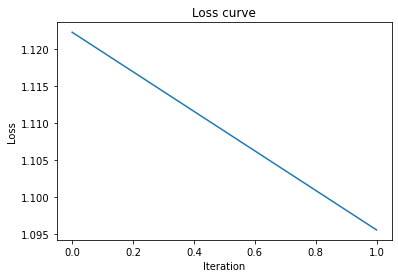

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in dev

2022-05-07 22:27:35.682235: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:27:35.682249: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:27:35.682253: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:27:35.682255: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:27:35.682258: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:27:35.682260: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-05-07 22:27:35.682262: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in 

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in 

Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in 

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in 

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in 

Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in 

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in 

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in 

Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in 

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in 

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in 

Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in 

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in 

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in 

Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in 

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in 

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in 

Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in 

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in 

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_82408 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in 

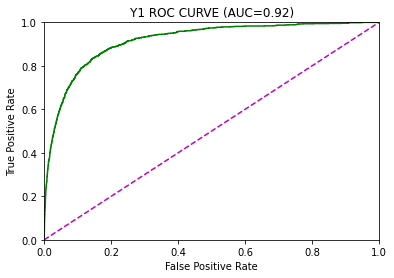

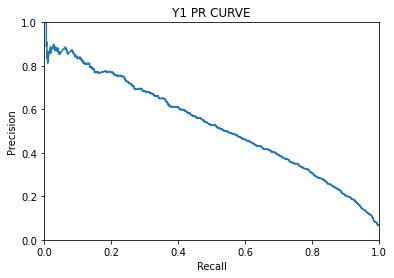

Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhos

Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhos

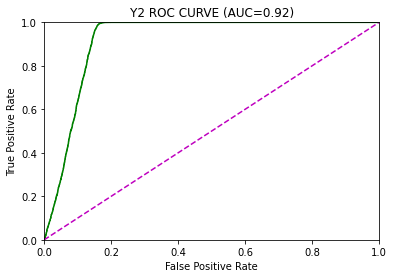

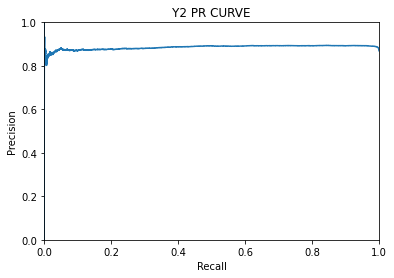

In [52]:
model=CTCVRNet()
model.train({},{},{}, train_data, val_data, test_data,2,128)